# Sentiment analysis on Trump's tweets using Python

In [36]:
# General:
import tweepy           # To consume Twitter's API
import pandas as pd     # To handle data
import numpy as np      # For number computing

# For plotting and visualization:
from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Creating a Twitter App

In [37]:
# Twitter App access keys for @user

# Consume:
CONSUMER_KEY    = 'yzxNyCyjkVJJrpNY0L3AphSVV'
CONSUMER_SECRET = 'e7xhbuIqTM520PCtwGrSrSIXWyrQbH7ckr9s0ToOlQE6tek4OP'

# Access:
ACCESS_TOKEN  = '2186056028-BPexxHqPrML7hcvwIuLfX3itD8IZPqguuksDHtn'
ACCESS_SECRET = 'vvhbgIqa7jK5nBAO9P4Mh1MTFvJdWH3Fl5bbzGhai9Dah'

In [38]:
# We import our access keys:
from credentials import *    # This will allow us to use the keys as variables

# API's setup:
def twitter_setup():
    """
    Utility function to setup the Twitter's API
    with our access keys provided.
    """
    # Authentication and access using keys:
    auth = tweepy.OAuthHandler(CONSUMER_KEY, CONSUMER_SECRET)
    auth.set_access_token(ACCESS_TOKEN, ACCESS_SECRET)

    # Return API with authentication:
    api = tweepy.API(auth)
    return api

In [39]:
query="narendra modi" # Enter user or query

In [40]:
# We create an extractor object:
extractor = twitter_setup()

# We create a tweet list based on query:
tweets = extractor.search(q=query, count=200)

# We create a tweet list based on user
#tweets = extractor.user_timeline(screen_name=query, count=200)

print("Number of tweets extracted: {}.\n".format(len(tweets)))

# We print the most recent 5 tweets:
print("5 recent tweets:\n")
for tweet in tweets[:5]:
    print(tweet.text)
    print()

Number of tweets extracted: 100.

5 recent tweets:

The Wire will be publishing a series reported from 18 villages in UP. We will look at the how UP is performing on e… https://t.co/cUHrZoO0hb

Gandhi Jayanti’ marks penultimate day of the on going  ‘Sachchta Hi Sewa Pakhwara’ being celebrated all over countr… https://t.co/7YE2YjxhtC

RT @VijooKrishnan: Delhi belongs to Kisans too. Condemn Barbaric attack on Annadata! Police brutality on protesting farmers at Delhi border…

RT @ashoswai: Modi's Another Jumla: Rs7000 crores have been spent to clean Ganga River, but Murli Manohar Joshi led Parliamentary Estimate…

DCM Dr. G. Parameshwar Outrage Against PM Narendra Modi| ಸುದ್ದಿ ಟಿವಿ
Suddi TV #DCM #GParameshwar #Anger… https://t.co/dfkFZR5ydx



In [41]:
# We create a pandas dataframe as follows:
data = pd.DataFrame(data=[tweet.text for tweet in tweets], columns=['Tweets'])

# We display the first 10 elements of the dataframe:
display(data.head(10))

,Tweets
0,The Wire will be publishing a series reported ...
1,Gandhi Jayanti’ marks penultimate day of the o...
2,RT @VijooKrishnan: Delhi belongs to Kisans too...
3,RT @ashoswai: Modi's Another Jumla: Rs7000 cro...
4,DCM Dr. G. Parameshwar Outrage Against PM Nare...
5,RT @MahapatPravat: Must read : Narendra Modi s...
6,RT @tavleen_singh: History will remember Naren...
7,RT @VijooKrishnan: Delhi belongs to Kisans too...
8,RT @DilliDurAst: Vijay Mallya can meet Arun Ja...
9,RT @ranjjeet_kaur: @jaisan1978 @PMOIndia @nare...


In [21]:
# Internal methods of a single tweet object:
print(dir(tweets[0]))

['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_api', '_json', 'author', 'contributors', 'coordinates', 'created_at', 'destroy', 'entities', 'favorite', 'favorite_count', 'favorited', 'geo', 'id', 'id_str', 'in_reply_to_screen_name', 'in_reply_to_status_id', 'in_reply_to_status_id_str', 'in_reply_to_user_id', 'in_reply_to_user_id_str', 'is_quote_status', 'lang', 'metadata', 'parse', 'parse_list', 'place', 'retweet', 'retweet_count', 'retweeted', 'retweeted_status', 'retweets', 'source', 'source_url', 'text', 'truncated', 'user']


# Adding relevant info to our dataframe

In [30]:
# We add relevant data:
data['len']  = np.array([len(tweet.text) for tweet in tweets])
data['ID']   = np.array([tweet.id for tweet in tweets])
data['Date'] = np.array([tweet.created_at for tweet in tweets])
data['Source'] = np.array([tweet.source for tweet in tweets])
data['Likes']  = np.array([tweet.favorite_count for tweet in tweets])
data['RTs']    = np.array([tweet.retweet_count for tweet in tweets])
data['Language'] = np.array([tweet.lang for tweet in tweets])


In [31]:
# Display of first 10 elements from dataframe:
display(data.head(10))

,Tweets,len,ID,Date,Source,Likes,RTs,SA,lang,geo,place,Language
0,RT @THarishyam: #WeWantOurHomes #FundNBCC @nar...,144,1047049566850363392,2018-10-02 09:04:04,Twitter for Android,0,7,-1,en,None,None,en
1,RT @bhati_jyotika: Where is our country going ...,140,1047049563914342400,2018-10-02 09:04:03,Twitter for Android,0,18,0,en,None,None,en
2,RT @rubyyadavbjp: प्रधान सेवक की नीतियों का हो...,140,1047049562161057794,2018-10-02 09:04:03,Twitter for Android,0,16,0,hi,None,None,hi
3,RT @UNICEFIndia: We need four Ps to make #Swac...,140,1047049557195010049,2018-10-02 09:04:02,Twitter for Android,0,3,1,en,None,None,en
4,@narendramodi ये किसान नहीं है किसान के भेष मे...,139,1047049557035626496,2018-10-02 09:04:02,Twitter for iPhone,0,0,0,hi,None,None,hi
5,RT @AnkitLal: गांधी जी और लाल बहादुर शास्त्री ...,140,1047049556733640705,2018-10-02 09:04:02,Twitter for iPhone,0,19,0,hi,None,None,hi
6,@sanjeevrsingh @narendramodi Who has given rig...,140,1047049556729454592,2018-10-02 09:04:02,Twitter for Android,0,0,1,en,None,None,en
7,RT @ashwaniattrish: @HPCL @HemantSirohi1 @dpra...,140,1047049554657460226,2018-10-02 09:04:01,Twitter for Android,0,2,0,en,None,None,en
8,RT @anantrao: @narendramodi @PMOIndia @rajnath...,139,1047049554049294336,2018-10-02 09:04:01,Twitter for Android,0,6,0,hi,None,None,hi
9,"RT @MissionBJP2019: 4 साल पहले, खुले में शौच क...",139,1047049550983303168,2018-10-02 09:04:00,Twitter for Android,0,39,0,hi,None,None,hi


In [32]:
# We extract the mean of lenghts:
mean = np.mean(data['len'])

print("The lenght's average in tweets: {}".format(mean))

The lenght's average in tweets: 132.24


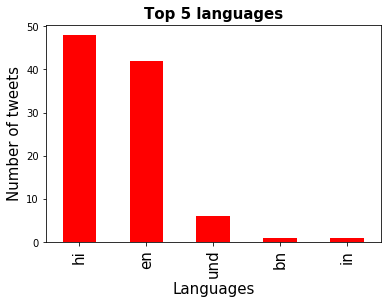

In [33]:
tweets_by_lang = data['Language'].value_counts()

fig, ax = plt.subplots()
ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=10)
ax.set_xlabel('Languages', fontsize=15)
ax.set_ylabel('Number of tweets' , fontsize=15)
ax.set_title('Top 5 languages', fontsize=15, fontweight='bold')
tweets_by_lang[:5].plot(ax=ax, kind='bar', color='red')

In [11]:
# We extract the tweet with more FAVs and more RTs:

fav_max = np.max(data['Likes'])
rt_max  = np.max(data['RTs'])

fav = data[data.Likes == fav_max].index[0]
rt  = data[data.RTs == rt_max].index[0]

# Max FAVs:
print("The tweet with more likes is: \n{}".format(data['Tweets'][fav]))
print("Number of likes: {}".format(fav_max))
print("{} characters.\n".format(data['len'][fav]))

# Max RTs:
print("The tweet with more retweets is: \n{}".format(data['Tweets'][rt]))
print("Number of retweets: {}".format(rt_max))
print("{} characters.\n".format(data['len'][rt]))

The tweet with more likes is: 
RT @THarishyam: #WeWantOurHomes #FundNBCC @narendramodi  G if U haven't guts &amp;power then why r U making false commitment asWe all know thei…
Number of likes: 0
144 characters.

The tweet with more retweets is: 
RT @narendramodi: सौम्य व्यक्तित्व, कुशल नेतृत्व एवं बुलंद हौसले के प्रतीक लाल बहादुर शास्त्री जी को उनकी जयंती पर विनम्र श्रद्धांजलि। 

जय…
Number of retweets: 5760
140 characters.



# Time series of Tweets

In [12]:
# We create time series for data:

tlen = pd.Series(data=data['len'].values, index=data['Date'])
tfav = pd.Series(data=data['Likes'].values, index=data['Date'])
tret = pd.Series(data=data['RTs'].values, index=data['Date'])

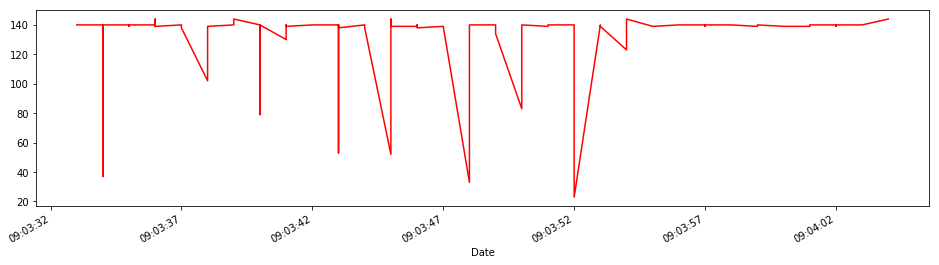

In [13]:
# Lenghts along time:
tlen.plot(figsize=(16,4), color='r');

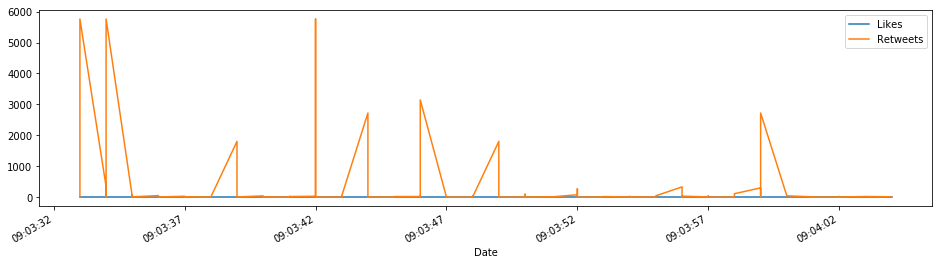

In [14]:
# Likes vs retweets visualization:
tfav.plot(figsize=(16,4), label="Likes", legend=True)
tret.plot(figsize=(16,4), label="Retweets", legend=True);

# Pie charts of sources

In [15]:
# We obtain all possible sources:
sources = []
for source in data['Source']:
    if source not in sources:
        sources.append(source)

# We print sources list:
print("Creation of content sources:")
for source in sources:
    print("* {}".format(source))

Creation of content sources:
* Twitter for Android
* Twitter for iPhone
* Twitter Web Client
* Twitter Lite
* Twitter for iPad


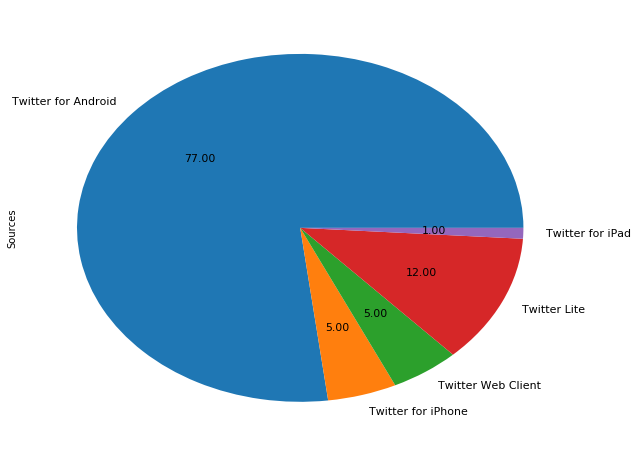

In [16]:
# We create a numpy vector mapped to labels:
percent = np.zeros(len(sources))

for source in data['Source']:
    for index in range(len(sources)):
        if source == sources[index]:
            percent[index] += 1
            pass

percent /= 100

# Pie chart:
pie_chart = pd.Series(percent, index=sources, name='Sources')
pie_chart.plot.pie(fontsize=11, autopct='%.2f', figsize=(10,8));

# Sentiment analysis

In [17]:
from textblob import TextBlob
import re

def clean_tweet(tweet):
    '''
    Utility function to clean the text in a tweet by removing 
    links and special characters using regex.
    '''
    return ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ", tweet).split())

def analize_sentiment(tweet):
    '''
    Utility function to classify the polarity of a tweet
    using textblob.
    '''
    analysis = TextBlob(clean_tweet(tweet))
    if analysis.sentiment.polarity > 0:
        return 1
    elif analysis.sentiment.polarity == 0:
        return 0
    else:
        return -1

In [18]:
# We create a column with the result of the analysis:
data['SA'] = np.array([ analize_sentiment(tweet) for tweet in data['Tweets'] ])

# We display the updated dataframe with the new column:
display(data.head(10))

,Tweets,len,ID,Date,Source,Likes,RTs,SA
0,RT @THarishyam: #WeWantOurHomes #FundNBCC @nar...,144,1047049566850363392,2018-10-02 09:04:04,Twitter for Android,0,7,-1
1,RT @bhati_jyotika: Where is our country going ...,140,1047049563914342400,2018-10-02 09:04:03,Twitter for Android,0,18,0
2,RT @rubyyadavbjp: प्रधान सेवक की नीतियों का हो...,140,1047049562161057794,2018-10-02 09:04:03,Twitter for Android,0,16,0
3,RT @UNICEFIndia: We need four Ps to make #Swac...,140,1047049557195010049,2018-10-02 09:04:02,Twitter for Android,0,3,1
4,@narendramodi ये किसान नहीं है किसान के भेष मे...,139,1047049557035626496,2018-10-02 09:04:02,Twitter for iPhone,0,0,0
5,RT @AnkitLal: गांधी जी और लाल बहादुर शास्त्री ...,140,1047049556733640705,2018-10-02 09:04:02,Twitter for iPhone,0,19,0
6,@sanjeevrsingh @narendramodi Who has given rig...,140,1047049556729454592,2018-10-02 09:04:02,Twitter for Android,0,0,1
7,RT @ashwaniattrish: @HPCL @HemantSirohi1 @dpra...,140,1047049554657460226,2018-10-02 09:04:01,Twitter for Android,0,2,0
8,RT @anantrao: @narendramodi @PMOIndia @rajnath...,139,1047049554049294336,2018-10-02 09:04:01,Twitter for Android,0,6,0
9,"RT @MissionBJP2019: 4 साल पहले, खुले में शौच क...",139,1047049550983303168,2018-10-02 09:04:00,Twitter for Android,0,39,0


In [19]:
# We construct lists with classified tweets:

pos_tweets = [ tweet for index, tweet in enumerate(data['Tweets']) if data['SA'][index] > 0]
neu_tweets = [ tweet for index, tweet in enumerate(data['Tweets']) if data['SA'][index] == 0]
neg_tweets = [ tweet for index, tweet in enumerate(data['Tweets']) if data['SA'][index] < 0]

In [20]:
# We print percentages:

print("Percentage of positive tweets: {}%".format(len(pos_tweets)*100/len(data['Tweets'])))
print("Percentage of neutral tweets: {}%".format(len(neu_tweets)*100/len(data['Tweets'])))
print("Percentage of negative tweets: {}%".format(len(neg_tweets)*100/len(data['Tweets'])))

Percentage of positive tweets: 17.0%
Percentage of neutral tweets: 76.0%
Percentage of negative tweets: 7.0%
